# Big Data Assignment - Estimation of obesity levels based on eating habits and physical condition

Python Version: 3.12.2

Packages Used: numpy, pandas, matplotlib, sklearn, scipy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

/var/folders/0q/2n40vcp54rng15n83s0yz7340000gn/T/ipykernel_90356/159710561.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [15]:
df = pd.read_csv("data_set.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Dataset Overview

The dataset consists of 2,111 entries, with each entry representing individual data points across 17 attributes. These attributes are designed to capture a range of factors related to personal habits, dietary preferences, and lifestyle choices, along with demographic information. The attributes are categorized as either features or a target variable, with their roles, types, demographics, and descriptions outlined as follows:

### Features

- **Gender** (Categorical): Gender of the individual. No missing values.
- **Age** (Continuous): Age of the individual. No missing values.
- **Height** (Continuous): Height of the individual in unspecified units. No missing values.
- **Weight** (Continuous): Weight of the individual in unspecified units. No missing values.
- **family_history_with_overweight** (Binary): Indicates whether a family member suffered or suffers from overweight. No missing values.
- **FAVC** (Binary): Reflects whether the individual frequently eats high caloric food. No missing values.
- **FCVC** (Integer): Indicates the usual consumption of vegetables in the individual's meals. No missing values.
- **NCP** (Continuous): Represents the number of main meals the individual has daily. No missing values.
- **CAEC** (Categorical): Describes the individual's habit of eating food between meals. No missing values.
- **SMOKE** (Binary): Indicates whether the individual smokes. No missing values.
- **CH2O** (Continuous): Amount of water the individual drinks daily, in unspecified units. No missing values.
- **SCC** (Binary): Reflects whether the individual monitors the calories they eat daily. No missing values.
- **FAF** (Continuous): Frequency of physical activity for the individual. No missing values.
- **TUE** (Integer): Amount of time the individual uses technological devices daily, in unspecified units. No missing values.
- **CALC** (Categorical): Frequency of alcohol consumption by the individual. No missing values.
- **MTRANS** (Categorical): Usual mode of transportation for the individual. No missing values.

### Target Variable

- **NObeyesdad** (Categorical): Categorizes the individual's obesity level. No missing values.

### Dataset Integrity

The dataset is fully populated, with no null values reported in any of the 17 columns, ensuring comprehensive data availability for analysis. The presence of both continuous and categorical (including binary and integer) data types necessitates appropriate preprocessing steps for analysis, including normalization for continuous variables and encoding for categorical variables.

This dataset provides a rich foundation for exploring the relationships between lifestyle factors, dietary habits, physical activity, and obesity levels, supporting a wide range of statistical analyses and predictive modeling endeavors.


The dataset has been retrieved from: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

## Renaming Columns for Improved Clarity

In the process of preparing our dataset for analysis, we identified that some of the original column names were not immediately intuitive or descriptive of the data they contain. To make our dataset more accessible and our analysis more understandable, we have renamed several columns to better reflect the nature of the data and the information they represent.

Here is a summary of the column name changes:

- `NObeyesdad` to `Obesity_Level`: Clarifies that this column categorizes the level of obesity.
- `FAVC` to `High_Caloric_Food_Frequency`: Provides clarity that this column refers to the frequency of consuming high-caloric food.
- `FCVC` to `Vegetable_Consumption_Frequency`: Indicates the frequency of vegetable consumption.
- `NCP` to `Main_Meals_Per_Day`: Describes the number of main meals consumed per day.
- `CAEC` to `Snacks_Between_Meals`: Indicates whether snacks are consumed between meals.
- `SMOKE` to `Smoker`: Simplifies understanding of whether the individual smokes.
- `CH2O` to `Daily_Water_Intake`: Specifies the daily water intake.
- `SCC` to `Calorie_Intake_Monitoring`: Indicates whether calorie intake is monitored.
- `FAF` to `Physical_Activity_Frequency`: Describes the frequency of physical activity.
- `TUE` to `Technology_Use_Time`: Reflects the time spent using technology.
- `CALC` to `Alcohol_Consumption_Frequency`: Indicates the frequency of alcohol consumption.
- `MTRANS` to `Main_Transportation_Mode`: Specifies the main mode of transportation used.

These changes aim to enhance the readability of the dataset and the subsequent analysis, making our findings more accessible to a broader audience.


In [16]:
# Renaming columns for clarity
df = df.rename(columns={
    'NObeyesdad': 'Obesity_Level',
    'FAVC': 'High_Caloric_Food_Frequency',
    'FCVC': 'Vegetable_Consumption_Frequency',
    'NCP': 'Main_Meals_Per_Day',
    'CAEC': 'Snacks_Between_Meals',
    'SMOKE': 'Smoker',
    'CH2O': 'Daily_Water_Intake',
    'SCC': 'Calorie_Intake_Monitoring',
    'FAF': 'Physical_Activity_Frequency',
    'TUE': 'Technology_Use_Time',
    'CALC': 'Alcohol_Consumption_Frequency',
    'MTRANS': 'Main_Transportation_Mode'
})


## Visualising the Data

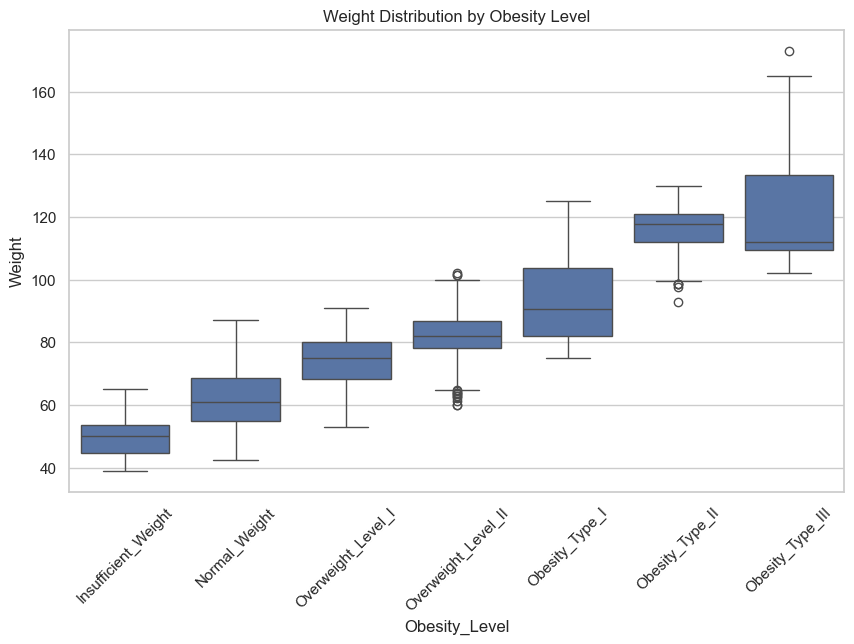

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Obesity_Level', y='Weight', data=df, order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('Weight Distribution by Obesity Level')
plt.xticks(rotation=45)
plt.show()

/var/folders/0q/2n40vcp54rng15n83s0yz7340000gn/T/ipykernel_90356/3801625091.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Gender', y='Weight', data=df, ax=axes[0, 1], ci=None)
/var/folders/0q/2n40vcp54rng15n83s0yz7340000gn/T/ipykernel_90356/3801625091.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(new_labels)


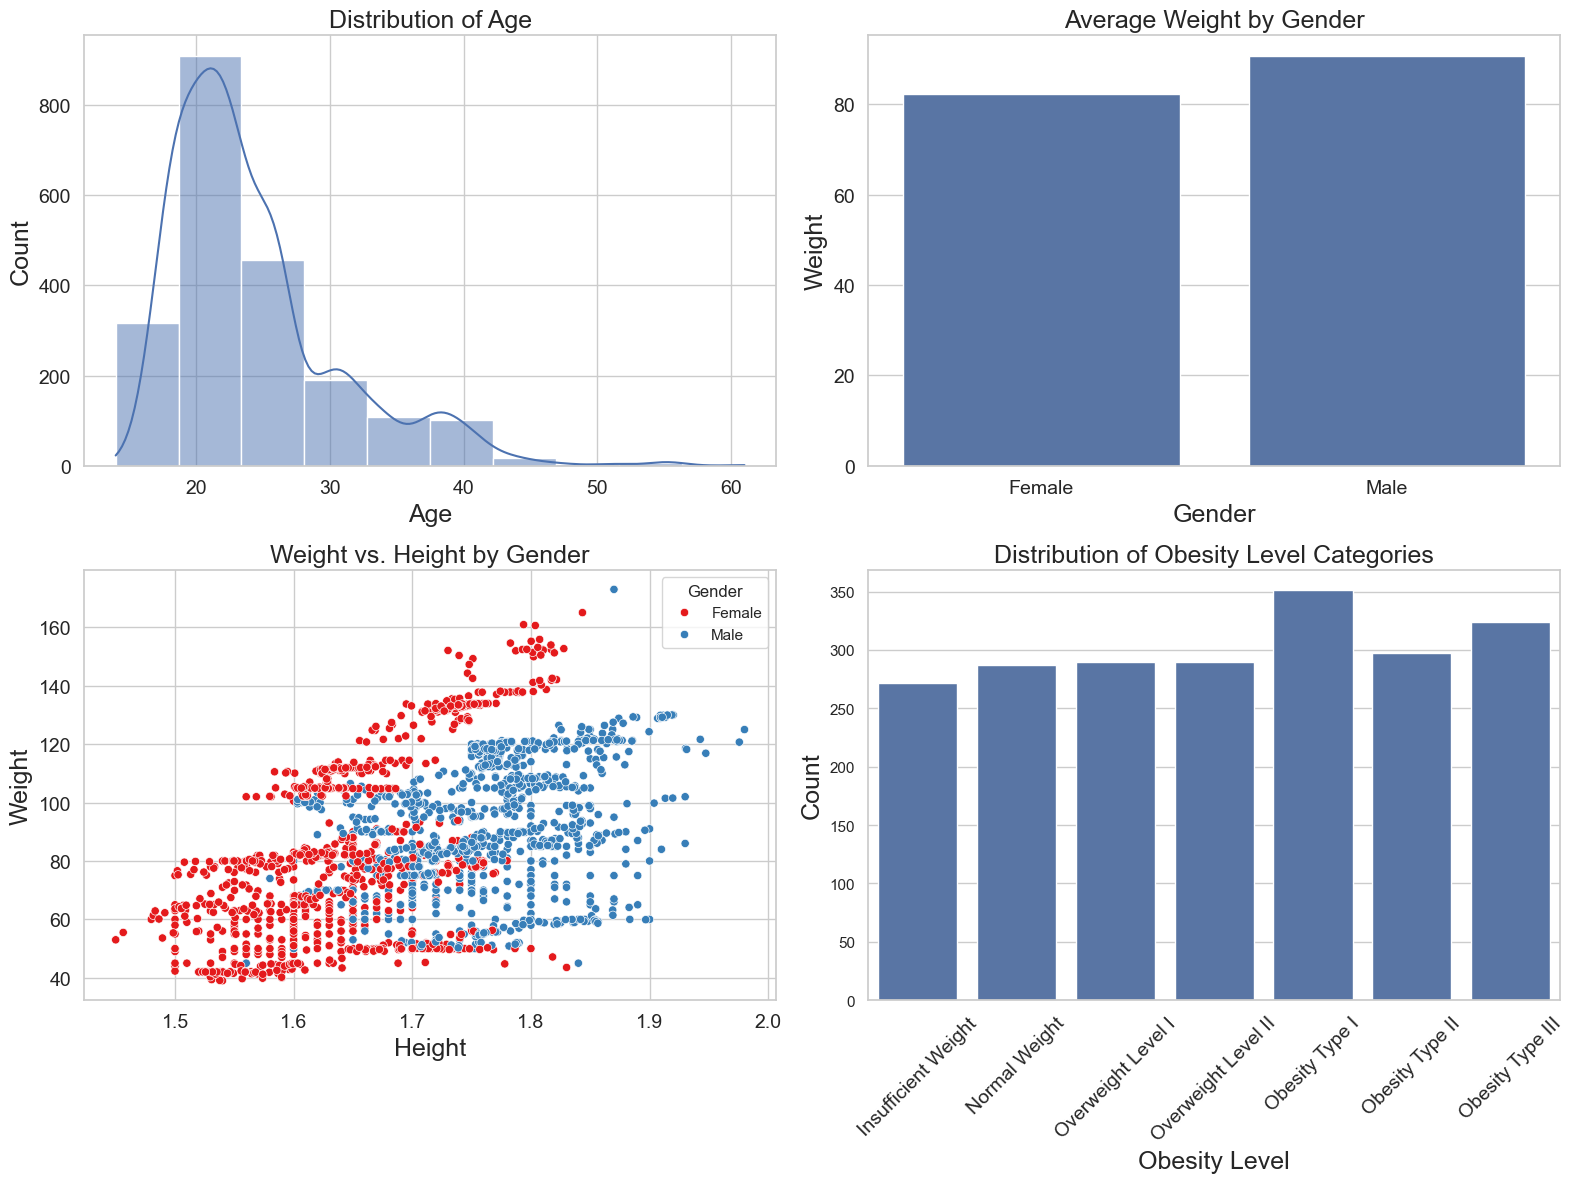

In [18]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Distribution of Age
sns.histplot(df['Age'], bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age', fontsize=18) 
axes[0, 0].set_xlabel('Age', fontsize=18)  
axes[0, 0].set_ylabel('Count', fontsize=18)  
axes[0, 0].tick_params(labelsize=14)  

# Plot 2: Average Weight by Gender
sns.barplot(x='Gender', y='Weight', data=df, ax=axes[0, 1], ci=None)
axes[0, 1].set_title('Average Weight by Gender', fontsize=18)
axes[0, 1].set_xlabel('Gender', fontsize=18)
axes[0, 1].set_ylabel('Weight', fontsize=18)
axes[0, 1].tick_params(labelsize=14)

# Plot 3: Weight vs. Height by Gender
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df, ax=axes[1, 0], palette='Set1')
axes[1, 0].set_title('Weight vs. Height by Gender', fontsize=18)
axes[1, 0].set_xlabel('Height', fontsize=18)
axes[1, 0].set_ylabel('Weight', fontsize=18)
axes[1, 0].tick_params(labelsize=14)

# Plot 4: Distribution of Obesity Level Categories
sns.countplot(x='Obesity_Level', data=df, ax=axes[1, 1], order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
axes[1, 1].set_title('Distribution of Obesity Level Categories', fontsize=18)
axes[1, 1].set_xlabel('Obesity Level', fontsize=18)
axes[1, 1].set_ylabel('Count', fontsize=18)
axes[1, 1].tick_params(axis='x', rotation=45, labelsize=14)

# Replace "_" with a space in the x-axis labels
new_labels = [label.get_text().replace('_', ' ') for label in axes[1, 1].get_xticklabels()]
axes[1, 1].set_xticklabels(new_labels)

plt.tight_layout()
plt.show()

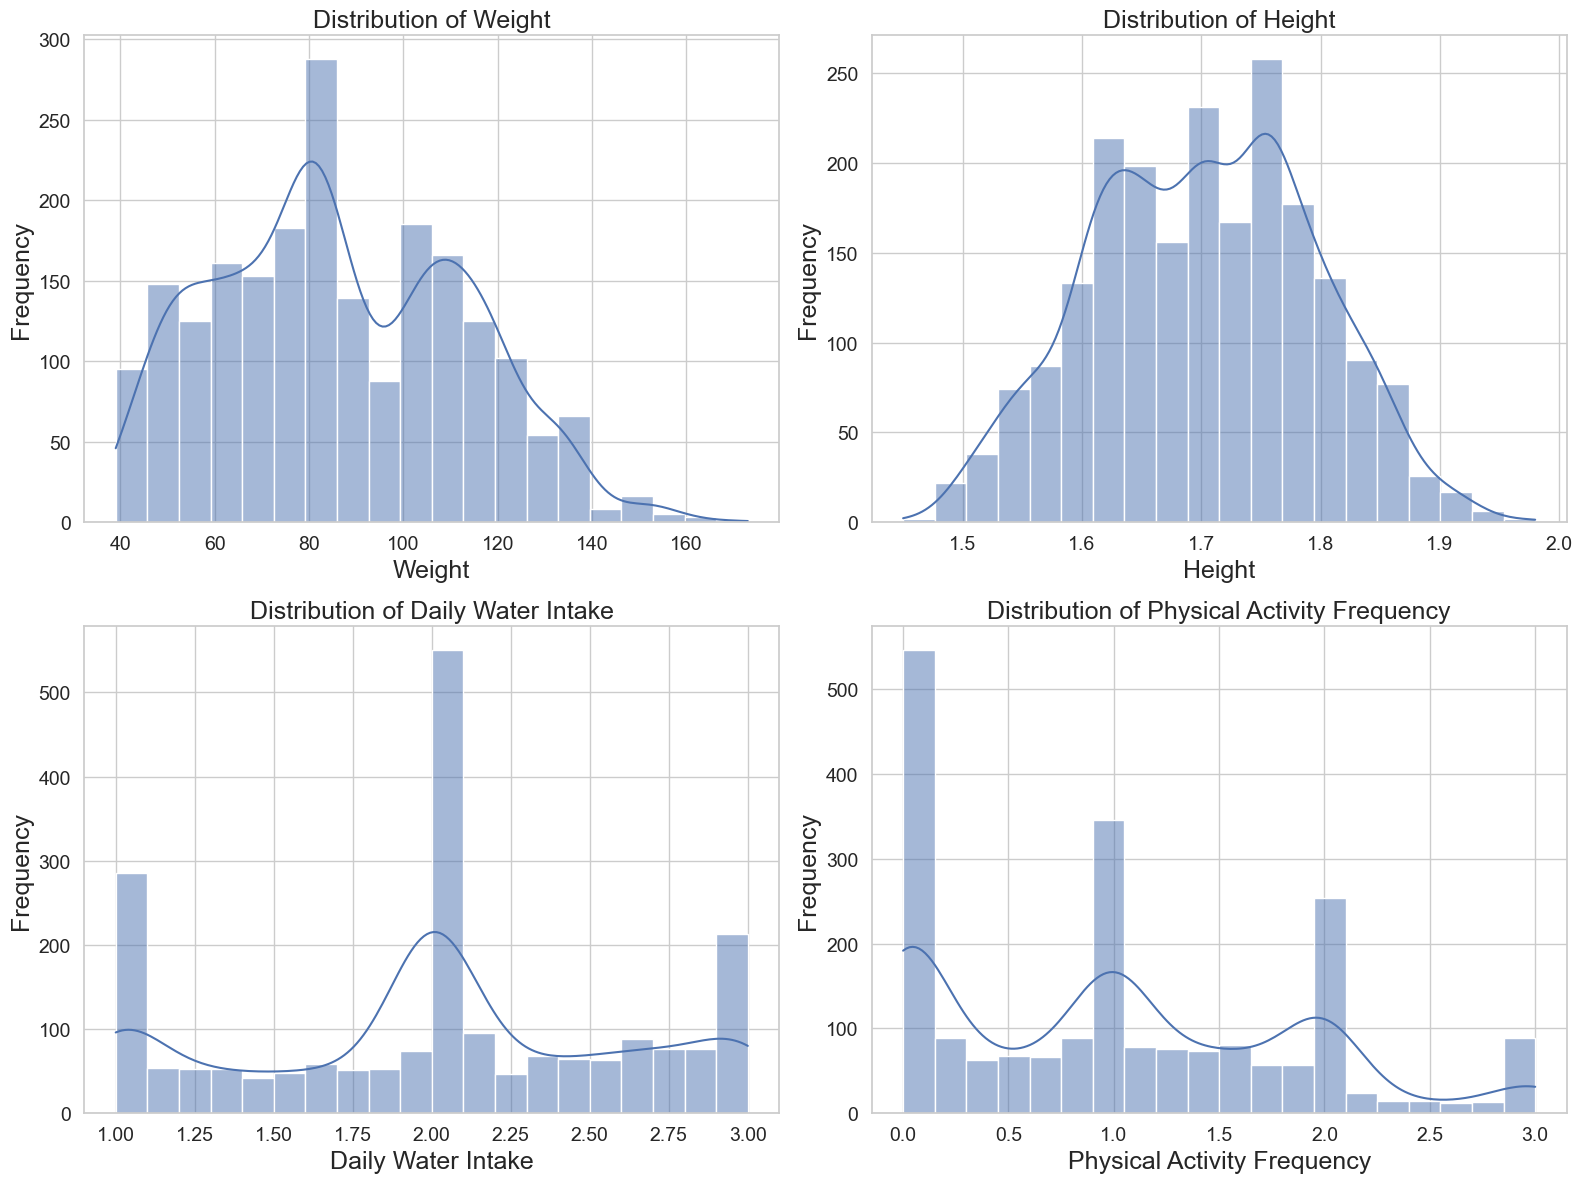

In [19]:
sns.set(style="whitegrid")
numerical_attributes = ['Weight', 'Height', 'Daily_Water_Intake', 'Physical_Activity_Frequency']
n = len(numerical_attributes)
rows = n // 2 + (n % 2 > 0)  # Adjusted for 2 columns layout

fig, axes = plt.subplots(rows, 2, figsize=(16, 6 * rows))  # Adjust size as needed
axes = axes.flatten()  # Flatten to easily iterate

# Create a histogram for each numerical attribute
for i, attribute in enumerate(numerical_attributes):
    sns.histplot(df[attribute], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {attribute.replace("_", " ")}', fontsize=18)  # Replace "_" with " " and increase font size
    axes[i].set_xlabel(attribute.replace("_", " "), fontsize=18)  # Increase x-axis label font size
    axes[i].set_ylabel('Frequency', fontsize=18)  # Increase y-axis label font size
    axes[i].tick_params(labelsize=14)  # Increase tick label font size

# Hide any unused subplots if the number of attributes is odd
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.subplots_adjust(hspace=0.3, wspace=0.2)  # Adjust space between plots
plt.tight_layout()
plt.show()

In [7]:
# Calculate BMI and add it as a new column. BMI is weight in kg divided by height in meters squared.
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

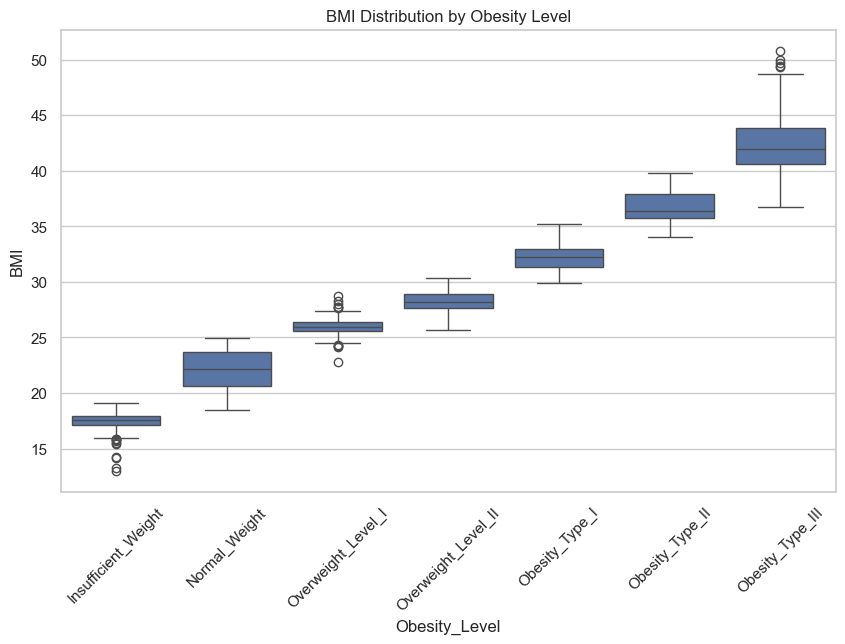

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Obesity_Level', y='BMI', data=df, order=['Insufficient_Weight','Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'])
plt.title('BMI Distribution by Obesity Level')
plt.xticks(rotation=45)
plt.show()

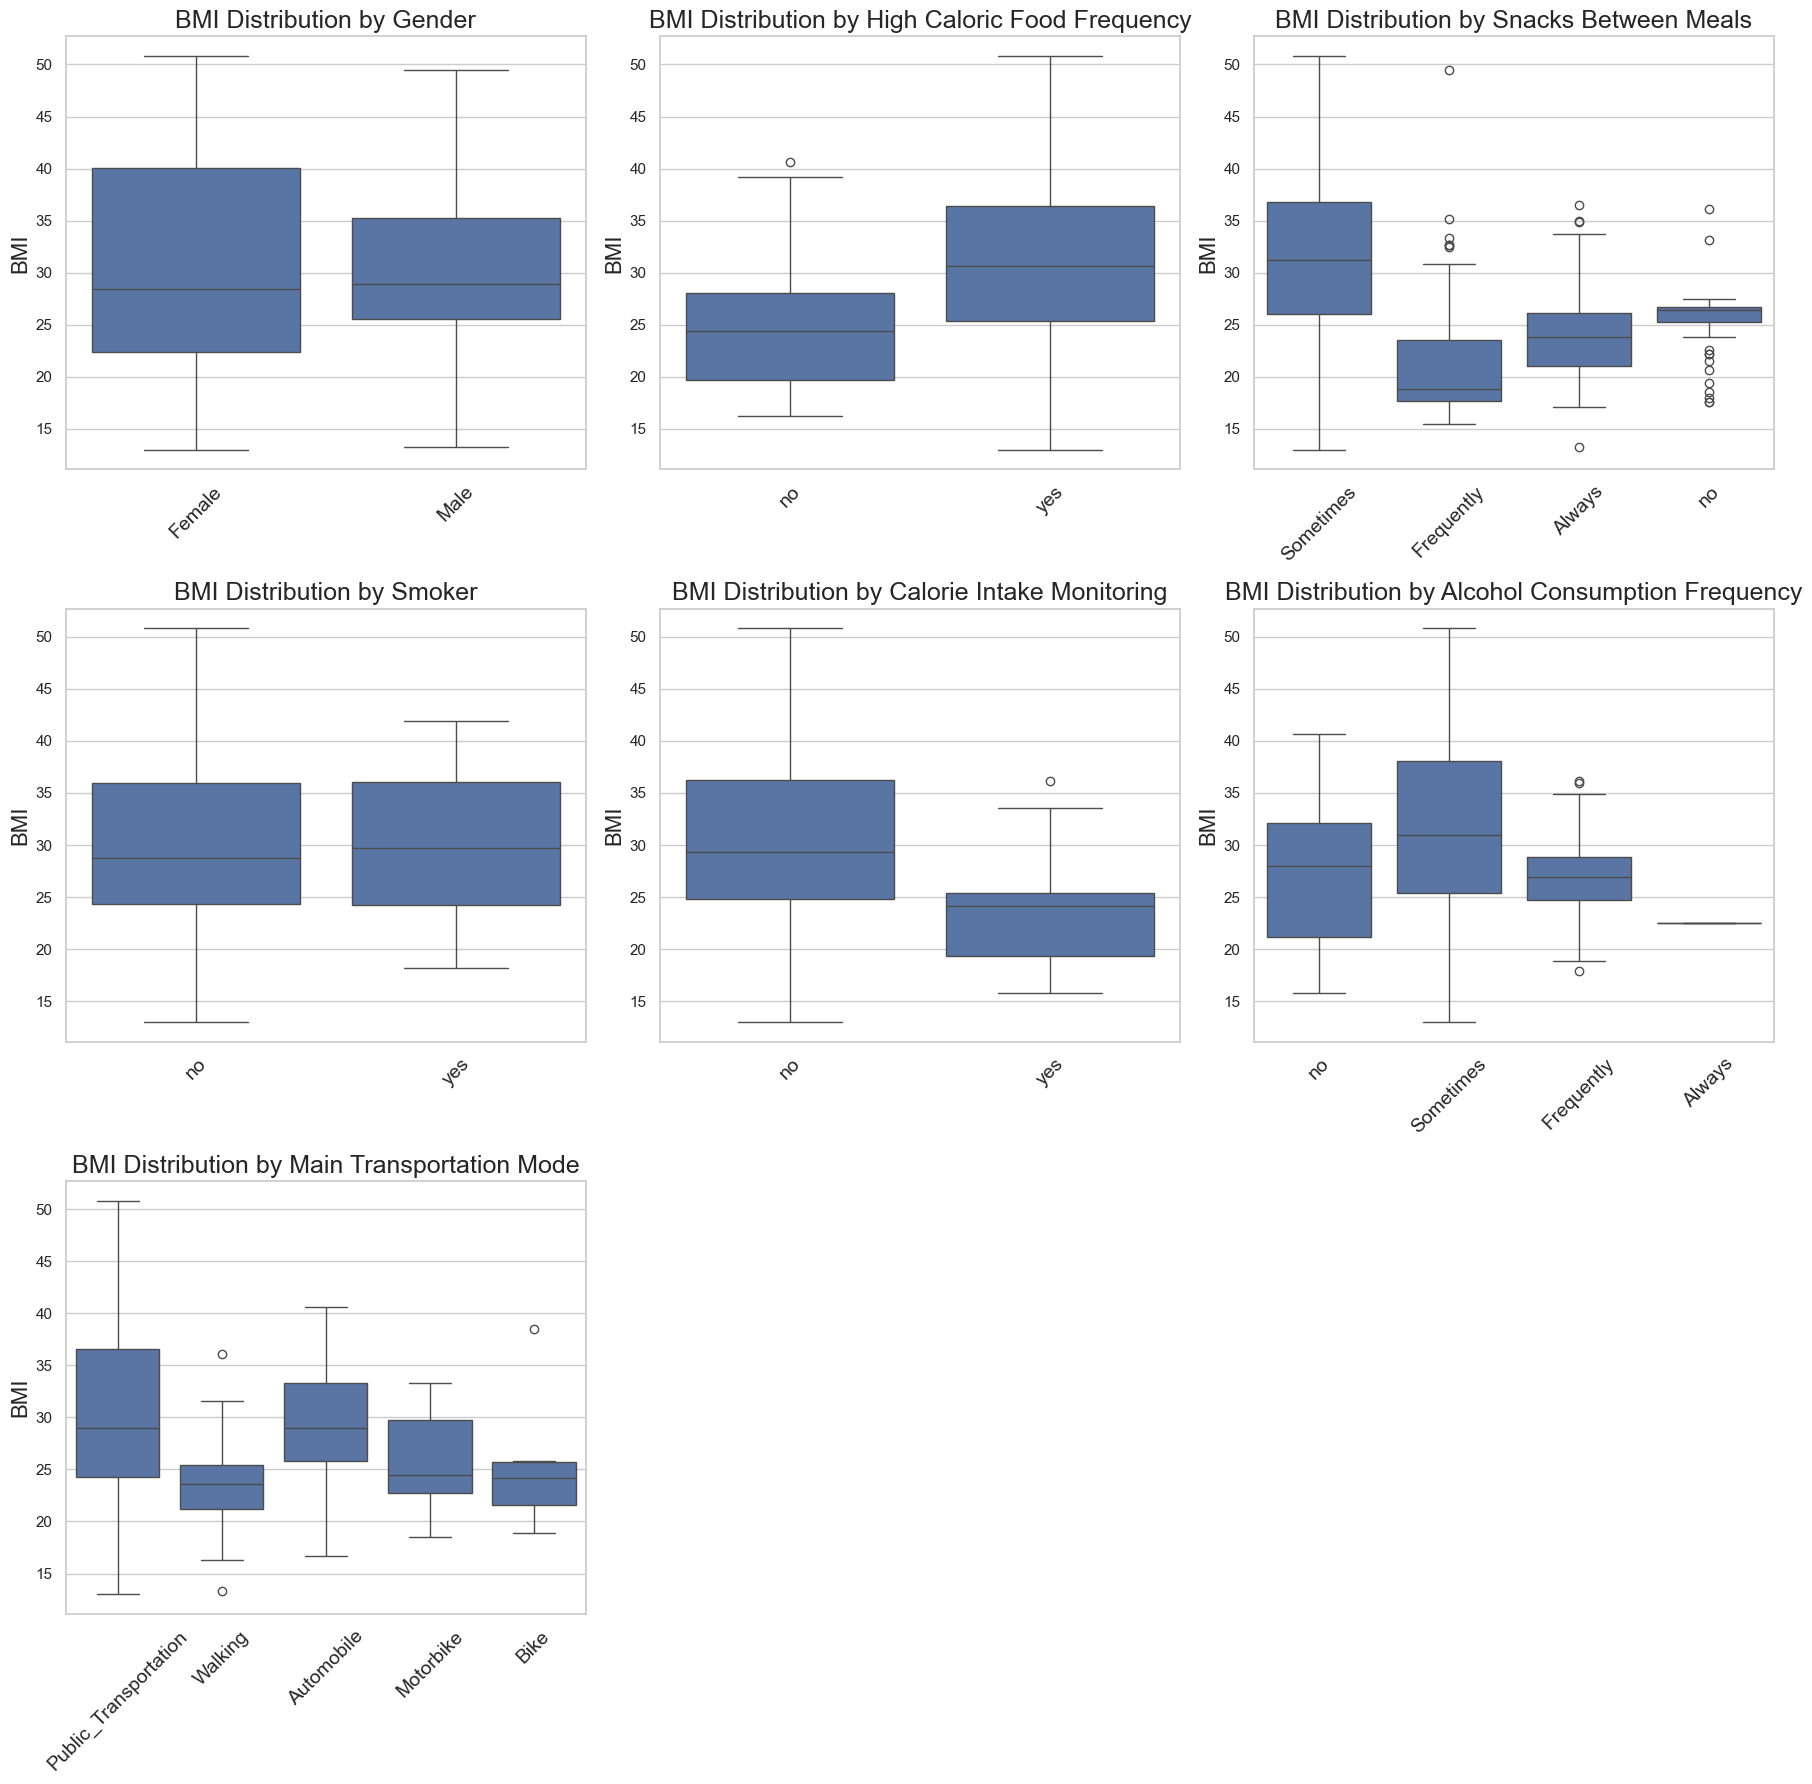

In [9]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# List of categorical attributes to plot against Weight
categorical_attributes = ['Gender', 'High_Caloric_Food_Frequency', 'Snacks_Between_Meals', 'Smoker', 'Calorie_Intake_Monitoring', 'Alcohol_Consumption_Frequency', 'Main_Transportation_Mode']

# Calculate the number of rows needed for a 3-column grid
n = len(categorical_attributes)
rows = n // 3 + (n % 3 > 0)

# Create a 3-wide grid of subplots
fig, axes = plt.subplots(rows, 3, figsize=(18, 6 * rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Creating Box Plots for each categorical attribute
for i, attribute in enumerate(categorical_attributes):
    sns.boxplot(x=attribute, y='BMI', data=df, ax=axes[i])
    formatted_title = attribute.replace("_", " ")
    axes[i].set_title(f'BMI Distribution by {formatted_title}', fontsize=18)
    axes[i].set_ylabel('BMI', fontsize=16)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45, labelsize=14)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

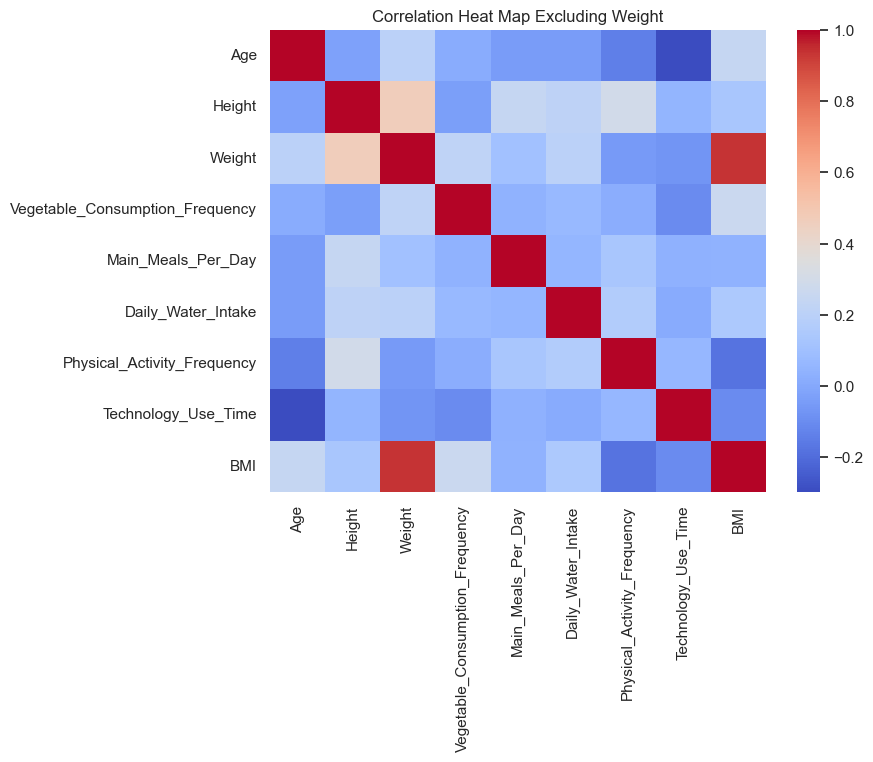

In [10]:
# Calculating the correlation matrix for numerical variables excluding 'Weight'
corr = df.select_dtypes(include=[np.number]).corr()

# Plotting the correlation heatmap without the 'Weight' column
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heat Map Excluding Weight')
plt.show()

## Clean the Data

In [11]:
# Now remove the 'BMI' column as well after its use
df = df.drop(columns='BMI')

## Split the Data

In [20]:
# Assuming df is your DataFrame and 'Obesity_Level' is the target
X = df.drop('Obesity_Level', axis=1)
y = df['Obesity_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [13]:
# Define the preprocessing for categorical columns
categorical_cols = ['Gender', 'Main_Transportation_Mode']  # example categories
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Define the preprocessing for numerical columns
numerical_cols = ['Age', 'Height', 'Weight']  # example numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Fit on the training data and transform both training and test data
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

## Hierarchical Clustering

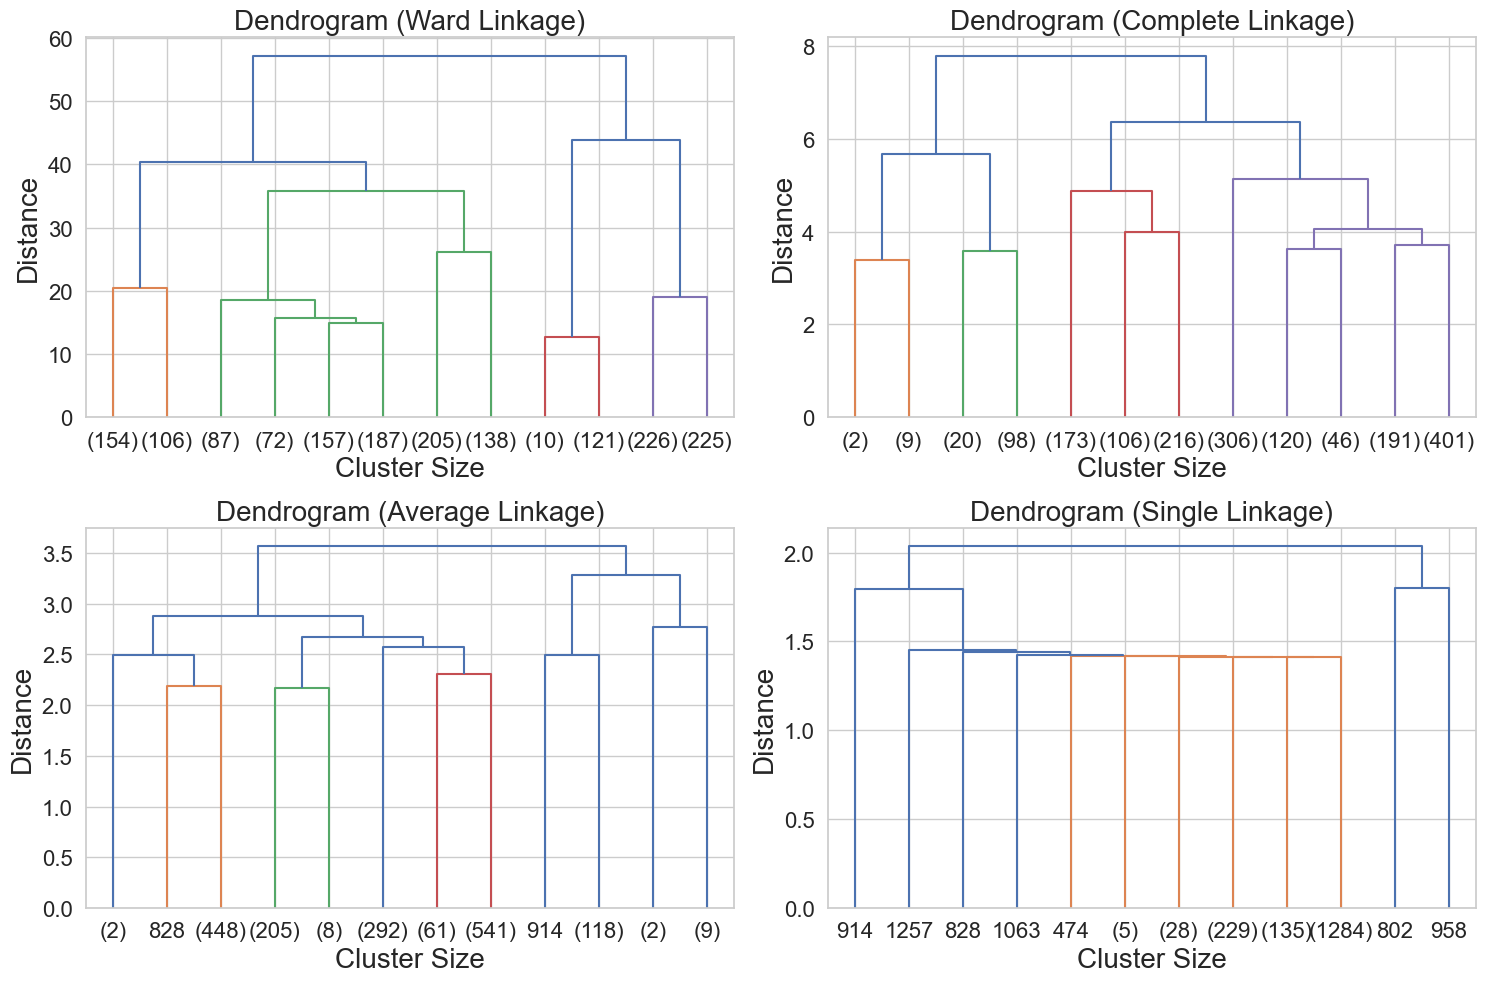

In [14]:
# Assuming X_train_transformed is your preprocessed data
# Convert to a dense format if it's sparse
if hasattr(X_train_transformed, "toarray"):
    X_dense = X_train_transformed.toarray()
else:
    X_dense = X_train_transformed

# Prepare the plot
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the axes array for easy iteration
linkage_methods = ['ward', 'complete', 'average', 'single']

for i, method in enumerate(linkage_methods):
    # Generate the linkage matrix using scipy
    Z = linkage(X_dense, method=method)
    
    # Plotting the dendrogram
    dendrogram(Z, ax=axes[i], truncate_mode='lastp', p=12)  # Show only the last p merged clusters
    axes[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)',  fontsize=20)
    axes[i].set_xlabel('Cluster Size',  fontsize=20)
    axes[i].set_ylabel('Distance',  fontsize=20)
    axes[i].tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
plt.show()

In [55]:
# Define linkage methods to evaluate and the range of clusters to consider
linkage_methods = ['ward', 'complete', 'average', 'single']
num_clusters_range = range(2, 15)  # From 2 to 15 clusters

# Initialize a dictionary to store the best scores and the optimal number of clusters
best_scores = {method: {"homogeneity": 0, "completeness": 0, "silhouette": 0, "optimal_clusters": 0} for method in linkage_methods}

for method in linkage_methods:
    best_silhouette = -1  # Initialize the best silhouette score
    for n_clusters in num_clusters_range:
        # Perform Agglomerative Clustering
        agg_clust = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        agg_clusters = agg_clust.fit_predict(X_train_transformed)
        
        # Calculate scores
        silhouette = silhouette_score(X_train_transformed, agg_clusters)
        
        # Check if this silhouette score is the best for this linkage method
        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_scores[method]["silhouette"] = silhouette
            best_scores[method]["optimal_clusters"] = n_clusters
            
            # Calculate and store homogeneity and completeness for the best silhouette
            best_scores[method]["homogeneity"] = homogeneity_score(y_train, agg_clusters)
            best_scores[method]["completeness"] = completeness_score(y_train, agg_clusters)

# Display the best scores and optimal number of clusters for each linkage method
for method, scores in best_scores.items():
    print(f"{method.capitalize()} linkage: Optimal Clusters={scores['optimal_clusters']}, "
          f"Silhouette={scores['silhouette']:.3f}, "
          f"Homogeneity={scores['homogeneity']:.3f}, "
          f"Completeness={scores['completeness']:.3f}")

Ward linkage: Optimal Clusters=10, Silhouette=0.350, Homogeneity=0.411, Completeness=0.363
Complete linkage: Optimal Clusters=2, Silhouette=0.320, Homogeneity=0.028, Completeness=0.199
Average linkage: Optimal Clusters=7, Silhouette=0.334, Homogeneity=0.283, Completeness=0.364
Single linkage: Optimal Clusters=2, Silhouette=0.514, Homogeneity=0.001, Completeness=0.259


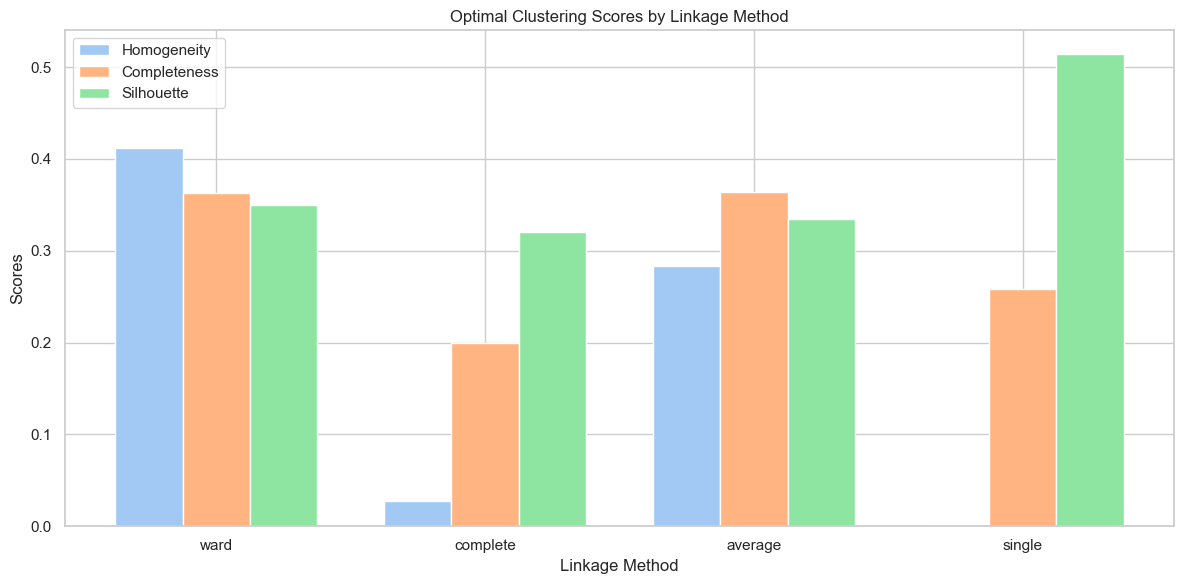

In [153]:
# Assuming best_scores contains the scores for each linkage method
linkage_methods = ['ward', 'complete', 'average', 'single']

# Extract scores from best_scores for plotting
homogeneity_scores = [best_scores[method]["homogeneity"] for method in linkage_methods]
completeness_scores = [best_scores[method]["completeness"] for method in linkage_methods]
silhouette_scores = [best_scores[method]["silhouette"] for method in linkage_methods]

# Setup for plotting
sns.set(style="whitegrid")
n_groups = len(linkage_methods)
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.25
index = np.arange(n_groups)

# Selecting a palette
palette = sns.color_palette("pastel") 

# Plotting scores
homogeneity_bars = ax.bar(index - bar_width, homogeneity_scores, bar_width, label='Homogeneity', color=palette[0])
completeness_bars = ax.bar(index, completeness_scores, bar_width, label='Completeness', color=palette[1])
silhouette_bars = ax.bar(index + bar_width, silhouette_scores, bar_width, label='Silhouette', color=palette[2])

# Plot setup
ax.set_xlabel('Linkage Method')
ax.set_ylabel('Scores')
ax.set_title('Optimal Clustering Scores by Linkage Method')
ax.set_xticks(index)
ax.set_xticklabels(linkage_methods)
ax.legend()

plt.tight_layout()
plt.show()

## K-means Clustering

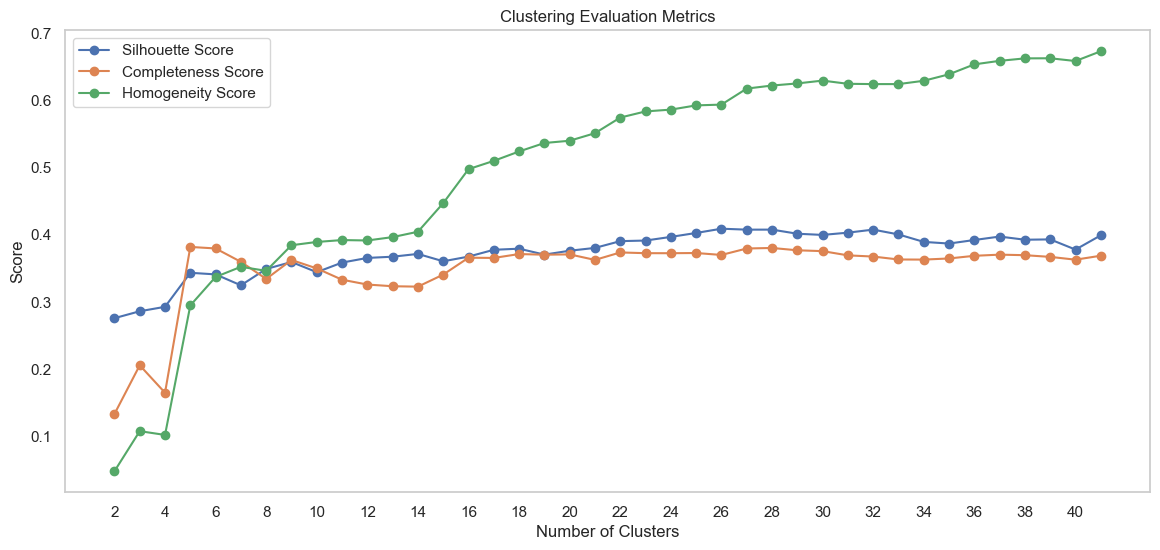

In [73]:


# Number of clusters range
num_clusters = range(2, 42)  # From 2 to 41 clusters

# Lists to store the metrics
silhouette_scores = []
completeness_scores = []
homogeneity_scores = []

# Loop over the range of cluster numbers
for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_transformed)
    clusters = kmeans.predict(X_train_transformed)
    
    # Calculate the metrics
    silhouette = silhouette_score(X_train_transformed, clusters)
    completeness = completeness_score(y_train, clusters)
    homogeneity = homogeneity_score(y_train, clusters)
    
    # Append the metrics to the lists
    silhouette_scores.append(silhouette)
    completeness_scores.append(completeness)
    homogeneity_scores.append(homogeneity)

# Plotting the metrics
plt.figure(figsize=(14, 6))

plt.plot(num_clusters, silhouette_scores, label='Silhouette Score', marker='o')
plt.plot(num_clusters, completeness_scores, label='Completeness Score', marker='o')
plt.plot(num_clusters, homogeneity_scores, label='Homogeneity Score', marker='o')

plt.title('Clustering Evaluation Metrics')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.legend()
plt.xticks(np.arange(min(num_clusters), max(num_clusters)+1, 2))
plt.grid(False)
plt.show()


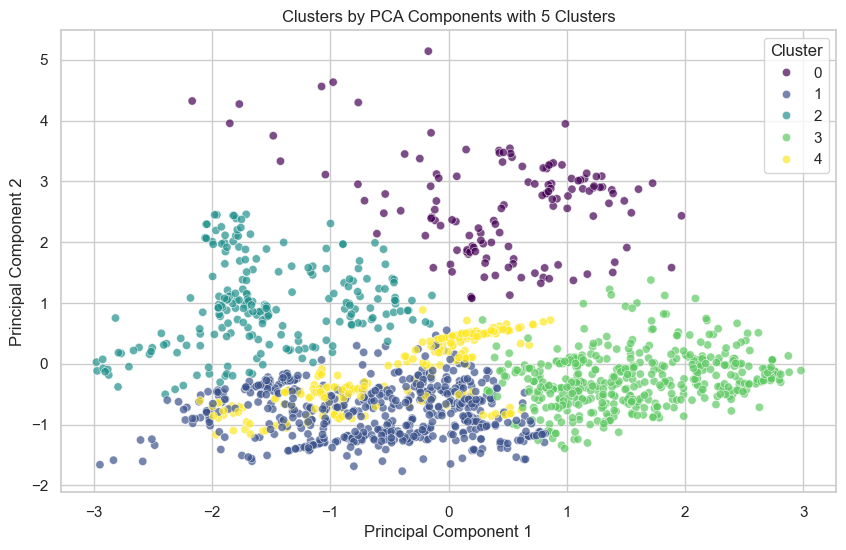

In [74]:
# Assuming k_optimal is your chosen optimal number of clusters
k_optimal = 5

# Perform k-means clustering with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42)
kmeans_optimal.fit(X_train_transformed)
clusters_optimal = kmeans_optimal.predict(X_train_transformed)

# Apply PCA to reduce dimensions for visualization
pca_optimal = PCA(n_components=2)
X_pca_optimal = pca_optimal.fit_transform(X_train_transformed)

# Create a DataFrame with PCA results and cluster labels for the optimal clustering
df_pca_optimal = pd.DataFrame(data=X_pca_optimal, columns=['Principal Component 1', 'Principal Component 2'])
df_pca_optimal['Cluster'] = clusters_optimal

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=df_pca_optimal, palette='viridis', alpha=0.7)
plt.title(f'Clusters by PCA Components with {k_optimal} Clusters')
plt.show()


## Supervised Learning

In [24]:
# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
logreg.fit(X_train_transformed, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [25]:
# Make predictions on the test set
y_pred = logreg.predict(X_test_transformed)

In [26]:

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9078014184397163
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.93      0.98      0.95        54
      Normal_Weight       0.90      0.79      0.84        58
     Obesity_Type_I       0.90      0.99      0.94        70
    Obesity_Type_II       0.98      1.00      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.75      0.88      0.81        58
Overweight_Level_II       0.91      0.71      0.80        58

           accuracy                           0.91       423
          macro avg       0.91      0.90      0.90       423
       weighted avg       0.91      0.91      0.91       423

Confusion Matrix:
 [[53  1  0  0  0  0  0]
 [ 4 46  0  0  0  8  0]
 [ 0  0 69  0  0  0  1]
 [ 0  0  0 60  0  0  0]
 [ 0  0  0  1 64  0  0]
 [ 0  4  0  0  0 51  3]
 [ 0  0  8  0  0  9 41]]


In [27]:
# Perform cross-validation
scores = cross_val_score(logreg, X_train_transformed, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated scores: {scores}")
print("Average score:", scores.mean())

Cross-validated scores: [0.87573964 0.88757396 0.87573964 0.89317507 0.85459941]
Average score: 0.8773655470300072
